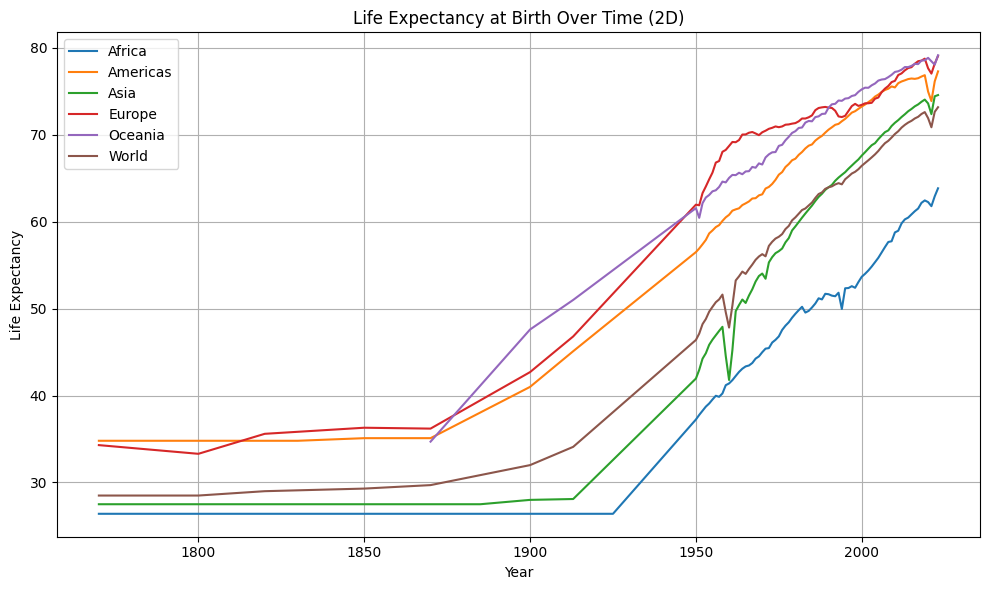

C:\Users\email\AppData\Local\Temp\ipykernel_25852\352774613.py:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


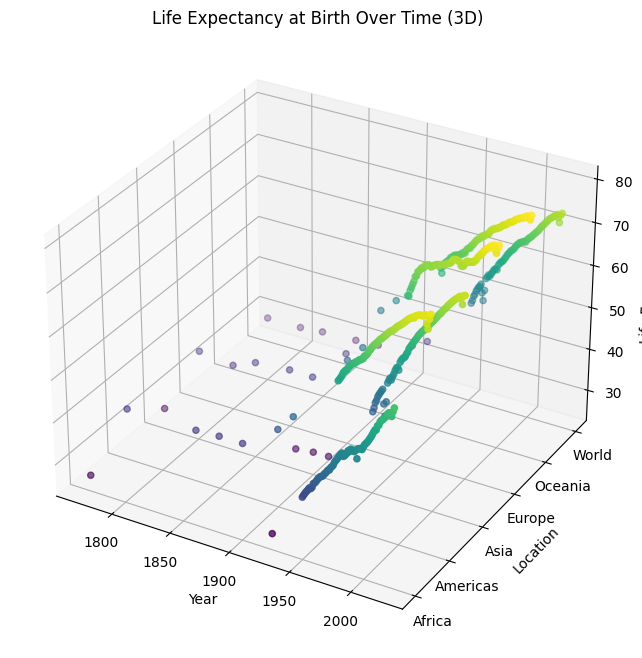

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Load the CSV
df = pd.read_csv("../data/life-expectancy.csv", usecols=[0, 2, 3], names=["Location", "Year", "LifeExpectancy"], header=0)

# Optional: check for NaNs or clean data
df.dropna(inplace=True)
df["Year"] = df["Year"].astype(int)
df["LifeExpectancy"] = df["LifeExpectancy"].astype(float)

# Step 2: 2D Line Chart
plt.figure(figsize=(10, 6))
for location in df["Location"].unique():
    subset = df[df["Location"] == location]
    plt.plot(subset["Year"], subset["LifeExpectancy"], label=location)

plt.title("Life Expectancy at Birth Over Time (2D)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Map locations to numbers for plotting in 3D
location_map = {loc: i for i, loc in enumerate(df["Location"].unique())}
df["LocationCode"] = df["Location"].map(location_map)

# Scatter 3D Plot
ax.scatter(df["Year"], df["LocationCode"], df["LifeExpectancy"], c=df["LifeExpectancy"], cmap='viridis', depthshade=True)

ax.set_xlabel("Year")
ax.set_ylabel("Location")
ax.set_zlabel("Life Expectancy")
ax.set_title("Life Expectancy at Birth Over Time (3D)")

# Adjust Y-ticks to show location names
ax.set_yticks(list(location_map.values()))
ax.set_yticklabels(list(location_map.keys()))

plt.tight_layout()
plt.show()
